In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.DataFrame([
    {'title': 'A', 'genre': 'Pop', 'penyanyi': 'Andi'},
    {'title': 'B', 'genre': 'Keroncong', 'penyanyi': 'Andi'},
    {'title': 'C', 'genre': 'Dangdut', 'penyanyi': 'Andi'},
    {'title': 'D', 'genre': 'Pop', 'penyanyi': 'Budi'},
    {'title': 'E', 'genre': 'Keroncong', 'penyanyi': 'Budi'},
    {'title': 'F', 'genre': 'Dangdut', 'penyanyi': 'Budi'},
    {'title': 'G', 'genre': 'Pop', 'penyanyi': 'Caca'},
    {'title': 'H', 'genre': 'Keroncong', 'penyanyi': 'Caca'},
    {'title': 'I', 'genre': 'Dangdut', 'penyanyi': 'Caca'},
    {'title': 'J', 'genre': 'Pop', 'penyanyi': 'Caca'},
])

df


,title,genre,penyanyi
0,A,Pop,Andi
1,B,Keroncong,Andi
2,C,Dangdut,Andi
3,D,Pop,Budi
4,E,Keroncong,Budi
5,F,Dangdut,Budi
6,G,Pop,Caca
7,H,Keroncong,Caca
8,I,Dangdut,Caca
9,J,Pop,Caca


In [3]:
cv = CountVectorizer()
cv.fit(df['genre'])

CountVectorizer()

In [4]:
cv.vocabulary_

{'pop': 2, 'keroncong': 1, 'dangdut': 0}

In [5]:
ngenre = cv.transform(df['genre'])
cv.get_feature_names()

['dangdut', 'keroncong', 'pop']

In [6]:
df_cv = pd.concat([df,pd.DataFrame(ngenre.toarray(),columns = cv.get_feature_names())],axis=1)
df_cv

,title,genre,penyanyi,dangdut,keroncong,pop
0,A,Pop,Andi,0,0,1
1,B,Keroncong,Andi,0,1,0
2,C,Dangdut,Andi,1,0,0
3,D,Pop,Budi,0,0,1
4,E,Keroncong,Budi,0,1,0
5,F,Dangdut,Budi,1,0,0
6,G,Pop,Caca,0,0,1
7,H,Keroncong,Caca,0,1,0
8,I,Dangdut,Caca,1,0,0
9,J,Pop,Caca,0,0,1


In [7]:
doc_1 = "Today, we learn how to build dinamic website and mobile apps"
doc_2 = "Today, we learn how to promote mobile apps to segmented market"
doc_3 = "Today, we learn how to build recommmender system"

documents = [doc_1,doc_2,doc_3]

In [8]:
count_vect = CountVectorizer(stop_words='english')
sparse_matrix = count_vect.fit_transform(documents)

In [9]:
df_doc = pd.DataFrame(sparse_matrix.toarray(),columns=count_vect.get_feature_names(),index='doc_1 doc_2 doc_3'.split())
df_doc['doc']=documents
df_doc

,apps,build,dinamic,learn,market,mobile,promote,recommmender,segmented,today,website,doc
doc_1,1,1,1,1,0,1,0,0,0,1,1,"Today, we learn how to build dinamic website a..."
doc_2,1,0,0,1,1,1,1,0,1,1,0,"Today, we learn how to promote mobile apps to ..."
doc_3,0,1,0,1,0,0,0,1,0,1,0,"Today, we learn how to build recommmender system"


In [10]:
cosine_similarity(df_doc.drop('doc',axis=1))

array([[1.        , 0.57142857, 0.56694671],
       [0.57142857, 1.        , 0.37796447],
       [0.56694671, 0.37796447, 1.        ]])

In [11]:
cos_score = cosine_similarity(ngenre)
pd.DataFrame(cos_score,index=df['genre'],columns=df['genre'])

genre,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop
genre,,,,,,,,,,
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
last_played = int(input('Musik terakhir yang di dengar ?'))

music_recom = list(enumerate(cos_score[last_played]))
music_recom

Musik terakhir yang di dengar ? 1


[(0, 0.0),
 (1, 1.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.0),
 (6, 0.0),
 (7, 1.0),
 (8, 0.0),
 (9, 0.0)]

In [13]:
your_recom = sorted(music_recom,key=lambda x:x[1],reverse=True)
your_recom

[(1, 1.0),
 (4, 1.0),
 (7, 1.0),
 (0, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [14]:
for i in your_recom[:5]:
    print(df.iloc[i[0]])

title               B
genre       Keroncong
penyanyi         Andi
Name: 1, dtype: object
title               E
genre       Keroncong
penyanyi         Budi
Name: 4, dtype: object
title               H
genre       Keroncong
penyanyi         Caca
Name: 7, dtype: object
title          A
genre        Pop
penyanyi    Andi
Name: 0, dtype: object
title             C
genre       Dangdut
penyanyi       Andi
Name: 2, dtype: object


## Anime Recommendation

In [15]:
anime = pd.read_csv('anime.csv')
anime.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [16]:
anime.shape

(12294, 7)

In [17]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

## Karena terlalu banyak diambil 850 movie teratas. CHUAKZ

In [18]:
anime = anime.iloc[:850]

In [19]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

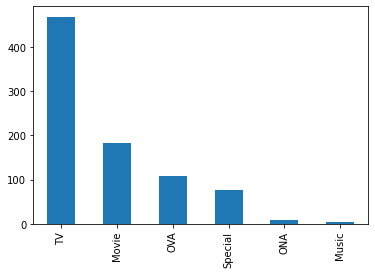

In [20]:
anime['type'].value_counts().plot(kind='bar')

In [21]:
anime.genre.value_counts()

Adventure, Comedy, Mystery, Police, Shounen                      17
Comedy, School, Slice of Life                                    15
Comedy, School, Shounen, Sports                                  10
Comedy, Drama, Shounen, Sports                                   10
Action, Drama, Mecha, Military, Sci-Fi, Space                     9
                                                                 ..
Fantasy, Historical, Romance                                      1
Adventure, Comedy, Kids, Sci-Fi                                   1
Comedy, Parody, Slice of Life                                     1
Comedy, Kids, Sci-Fi, Shounen                                     1
Dementia, Drama, Mystery, Psychological, Sci-Fi, Supernatural     1
Name: genre, Length: 517, dtype: int64

In [22]:
anime.shape

(850, 7)

## Create Recommender System Sederhana

In [23]:
cvr = CountVectorizer(
    tokenizer = lambda x:x.split(', ')
)

mgenre = cvr.fit_transform(anime['genre'])

mgenre.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
print(len(cvr.get_feature_names()))
print(cvr.get_feature_names())

40
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire']


In [25]:
cos_score_anime = cosine_similarity(mgenre)
pd.DataFrame(cos_score_anime,index=anime['genre'],columns=anime['genre'])

genre,"Drama, Romance, School, Supernatural","Action, Adventure, Drama, Fantasy, Magic, Military, Shounen","Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","Sci-Fi, Thriller","Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","Comedy, Drama, School, Shounen, Sports","Action, Adventure, Shounen, Super Power","Drama, Military, Sci-Fi, Space","Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen","Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",...,"Drama, Mecha, Military, Sci-Fi, Space","Action, Comedy, Martial Arts, Shounen, Super Power","Comedy, Slice of Life","Music, Shounen","Action, Comedy, Mecha, Sci-Fi, Space","Comedy, School, Super Power","Action, Drama, Horror, Military, Mystery, Supernatural, Vampire","Action, Demons, Historical, Romance, Supernatural","Comedy, Sports","Comedy, Drama, Fantasy, Romance, Shoujo, Slice of Life"
genre,,,,,,,,,,,,,,,,,,,,,
"Drama, Romance, School, Supernatural",1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.223607,0.000000,0.000000,0.000000,0.000000,0.288675,0.377964,0.447214,0.000000,0.408248
"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.338062,0.338062,0.000000,0.267261,0.169031,0.000000,0.428571,0.169031,0.000000,0.308607
"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
"Sci-Fi, Thriller",0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.316228,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000
"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Comedy, School, Super Power",0.288675,0.000000,0.218218,0.000000,0.218218,0.516398,0.288675,0.000000,0.218218,0.218218,...,0.000000,0.516398,0.408248,0.000000,0.258199,1.000000,0.000000,0.000000,0.408248,0.235702
"Action, Drama, Horror, Military, Mystery, Supernatural, Vampire",0.377964,0.428571,0.142857,0.000000,0.142857,0.169031,0.188982,0.377964,0.142857,0.142857,...,0.338062,0.169031,0.000000,0.000000,0.169031,0.000000,1.000000,0.338062,0.000000,0.154303
"Action, Demons, Historical, Romance, Supernatural",0.447214,0.169031,0.338062,0.000000,0.338062,0.000000,0.223607,0.000000,0.338062,0.338062,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.338062,1.000000,0.000000,0.182574


In [26]:
pd.DataFrame(cos_score_anime,index=anime['name'],columns=anime['name']).loc['Hunter x Hunter (2011)'].sort_values(ascending=False).head(20)

name
Hunter x Hunter: Greed Island Final                                     1.000000
Hunter x Hunter OVA                                                     1.000000
Hunter x Hunter                                                         1.000000
Hunter x Hunter: Greed Island                                           1.000000
Hunter x Hunter (2011)                                                  1.000000
Naruto: Shippuuden Movie 6 - Road to Ninja                              0.894427
Noragami Aragoto OVA                                                    0.866025
Noragami OVA                                                            0.866025
Saint Seiya: The Lost Canvas - Meiou Shinwa 2                           0.816497
Saint Seiya: The Lost Canvas - Meiou Shinwa                             0.816497
One Piece: Episode of Luffy - Hand Island no Bouken                     0.816497
One Piece Film: Strong World Episode 0                                  0.816497
Dragon Ball Kai        

In [27]:
anime_like = input('Anime yang anda sukai :')
index_suka = anime[anime['name']==anime_like].index[0]
anime_recom = list(enumerate(cos_score_anime[index_suka]))
anime_recom_sorted = sorted(anime_recom, key = lambda x:x[1],reverse=True)
anime_recom_sorted[1:11]

Anime yang anda sukai : Dragon Ball


[(206, 0.9258200997725515),
 (515, 0.9258200997725515),
 (588, 0.9258200997725515),
 (352, 0.8333333333333336),
 (753, 0.8333333333333336),
 (430, 0.8164965809277261),
 (74, 0.7715167498104596),
 (231, 0.7715167498104596),
 (241, 0.7715167498104596),
 (486, 0.7302967433402215)]

In [29]:
anime_recom_70 = list(filter(lambda x:x[1]>0.7, anime_recom))
anime_recom_70_sorted=sorted(anime_recom_70, key=lambda x:x[1],reverse=True)
anime_recom_70_sorted

[(346, 1.0000000000000002),
 (206, 0.9258200997725515),
 (515, 0.9258200997725515),
 (588, 0.9258200997725515),
 (352, 0.8333333333333336),
 (753, 0.8333333333333336),
 (430, 0.8164965809277261),
 (74, 0.7715167498104596),
 (231, 0.7715167498104596),
 (241, 0.7715167498104596),
 (486, 0.7302967433402215),
 (615, 0.7302967433402215),
 (784, 0.7302967433402215),
 (841, 0.7302967433402215),
 (307, 0.7071067811865477)]

In [30]:
for i in anime_recom_70_sorted[1:]:
    print(anime.iloc[i[0]]['name'])

Dragon Ball Z
Dragon Ball Kai (2014)
Dragon Ball Kai
One Piece Film: Strong World Episode 0
One Piece: Episode of Luffy - Hand Island no Bouken
One Piece 3D2Y: Ace no shi wo Koete! Luffy Nakama Tono Chikai
One Piece
One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari
One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna
Boruto: Naruto the Movie
Naruto: Shippuuden
Naruto: Shippuuden Movie 6 - Road to Ninja
Naruto
Lupin III: Cagliostro no Shiro
